# Open Data Japan - Public Holidays 1955 - 2022

## Preamble

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
sns.set(font="YU Gothic UI")

## Load data

In [12]:
path_data = "../data/processed/odj-data-public_holidays.csv"
df = pd.read_csv(path_data, encoding="UTF-8")

df_d = df.copy()
df_d["DATE_OF_PUBLIC_HOLIDAY"] = pd.to_datetime(df_d["DATE_OF_PUBLIC_HOLIDAY"])

## Sample analysis

### Number of public holidays per year

We will first take a look at the number of public holidays per year.

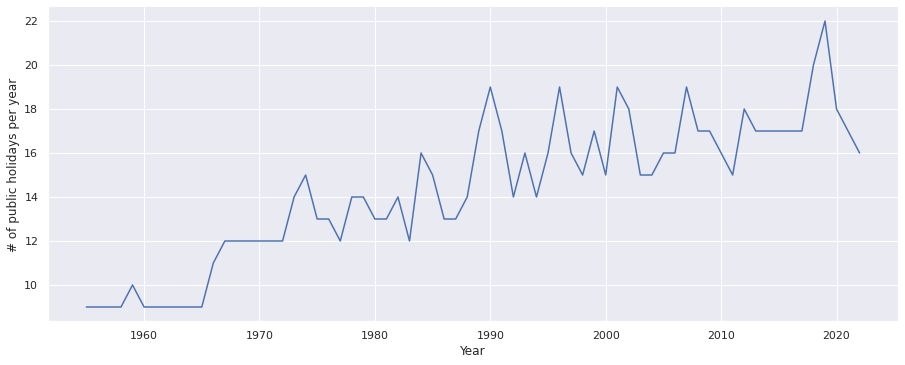

In [55]:
df_01 = pd.DataFrame(df_d.groupby(df_d.DATE_OF_PUBLIC_HOLIDAY.dt.year).count()["NAME_OF_PUBLIC_HOLIDAY_JP"]).reset_index()

ax = sns.relplot(
    data=df_01,
    x="DATE_OF_PUBLIC_HOLIDAY", y="NAME_OF_PUBLIC_HOLIDAY_JP",
    kind="line",
    height=5, aspect=2.5, 
)
ax.set(xlabel='Year', ylabel='# of public holidays per year')

plt.show()

Yearly public holidays have been steadily increasing snice the 1950s - that's great news!   

Naturally we want to know we want to know what these new holidays are.


### Addition and removal of public holidays